# Seabornによる可視化

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import japanize_matplotlib

In [8]:
# データセットの用意
file_path = '../dataset/house_price_jp.csv'
df = pd.read_csv(file_path, sep=',')

#### 前処理

In [9]:
# priceカラムの各値に対して10を底とする対数を計算し、新しいカラムLog10_priceに結果を格納
df['Log10_price'] = df['price'].apply(lambda x: np.log10(x))
# 1H30?2H等はNanで埋めて残りを数値にする
df['station_dis'] = pd.to_numeric(df['station_dis'], errors='coerce')
# 2000㎡以上をNanにし残りを数値にする
df['area'] = pd.to_numeric(df['area'], errors='coerce')
# Nan値をdropする
df = df.dropna(subset=['station_dis', 'area'])

<Axes: xlabel='building_year', ylabel='Log10_price'>

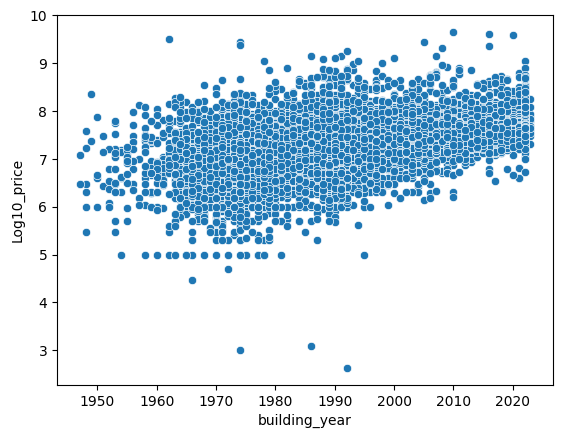

In [10]:
sns.scatterplot(data=df, x='building_year', y='Log10_price')

In [12]:
df['room'].unique()

array(['３ＬＤＫ', '２ＬＤＫ', '１Ｒ', '１ＤＫ', nan, '１ＬＤＫ', '２ＤＫ', '４ＬＤＫ', '１Ｋ',
       '３ＬＤＫ＋Ｓ', '２ＬＤＫ＋Ｓ', '５ＬＤＫ', '１ＬＤＫ＋Ｓ', '３ＤＫ', '４ＤＫ', 'オープンフロア',
       '２Ｋ', '２ＤＫ＋Ｓ', '１ＤＫ＋Ｓ', '３Ｋ', '４ＬＤＫ＋Ｓ', '４Ｋ', '５ＤＫ'], dtype=object)

<Axes: xlabel='building_year', ylabel='Log10_price'>

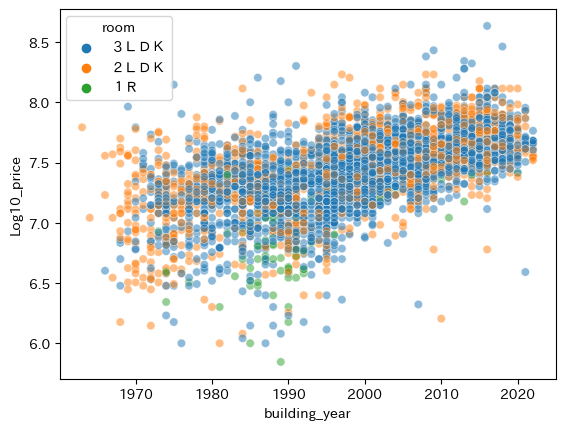

In [13]:
target_room = ['３ＬＤＫ', '２ＬＤＫ', '１Ｒ']
target_df = df.query('room in @target_room')
sns.scatterplot(data=target_df, x='building_year', y='Log10_price', hue='room', alpha=0.5)

scatterplotにhueを設定することにより、簡単にグラフ描画できる。つまり、matplotlibより簡単に複雑なplotができる

### jointplot

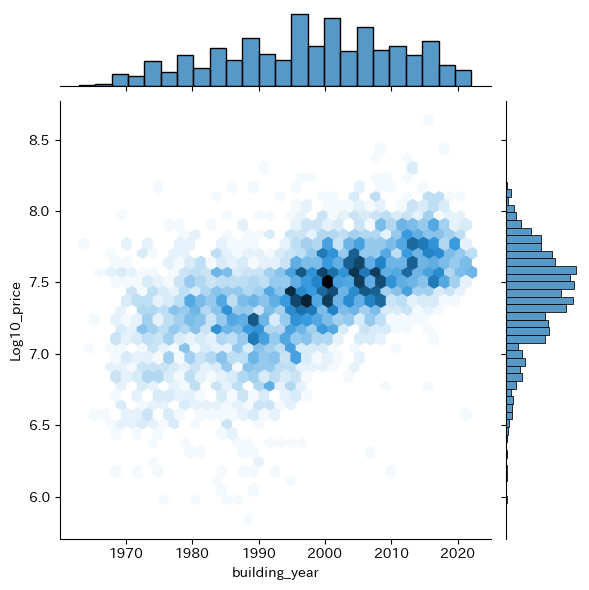

In [14]:
sns.jointplot(data=target_df, x='building_year', y='Log10_price', kind='hex')

In [16]:
target_df.select_dtypes(['float64', 'int64']).columns

Index(['index', 'building_year', 'station_dis', 'price', 'price_per_tsubo',
       'area', 'frontage', 'BCR', 'FAR', 'Log10_price'],
      dtype='object')

In [20]:
col_names = ['building_year', 'station_dis',
        'area', 'frontage', 'BCR', 'FAR', 'Log10_price'] + ['room']

C:\Users\TakagiNaoki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


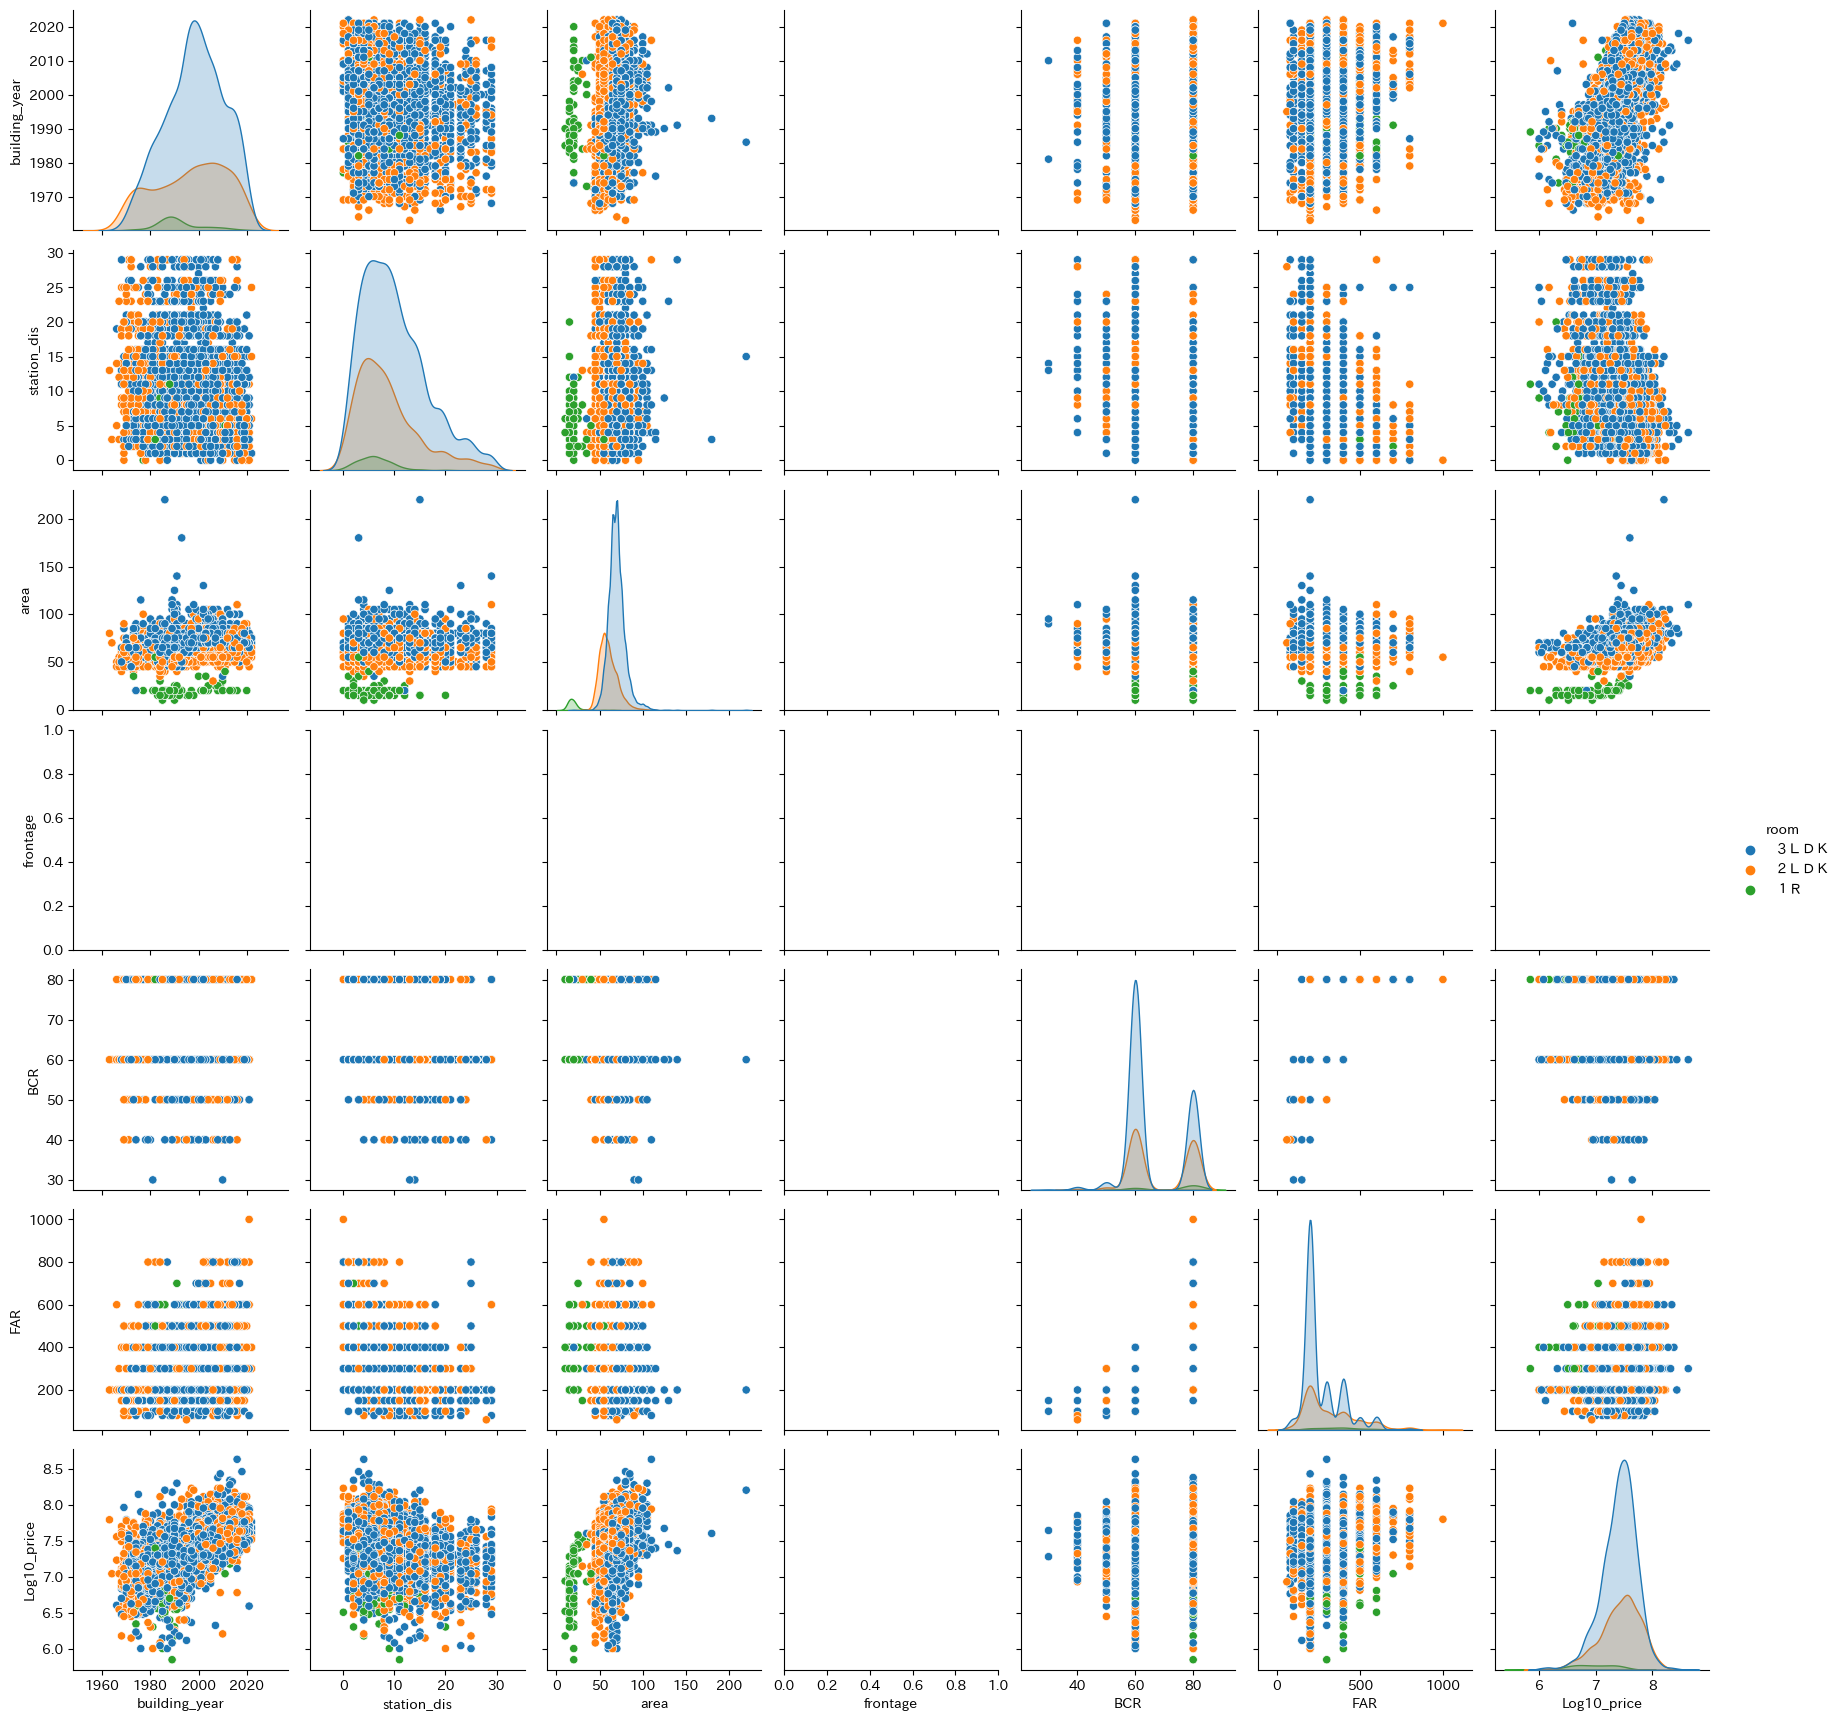

In [22]:
sns.pairplot(data=target_df[col_names], hue='room')

histplot boxplot violiplot

データの分布を見る


<Axes: xlabel='Log10_price', ylabel='Density'>

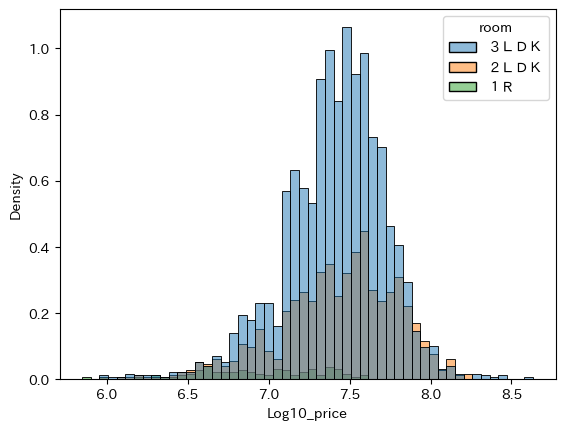

In [23]:
sns.histplot(data=target_df, x='Log10_price', hue='room', stat='density')

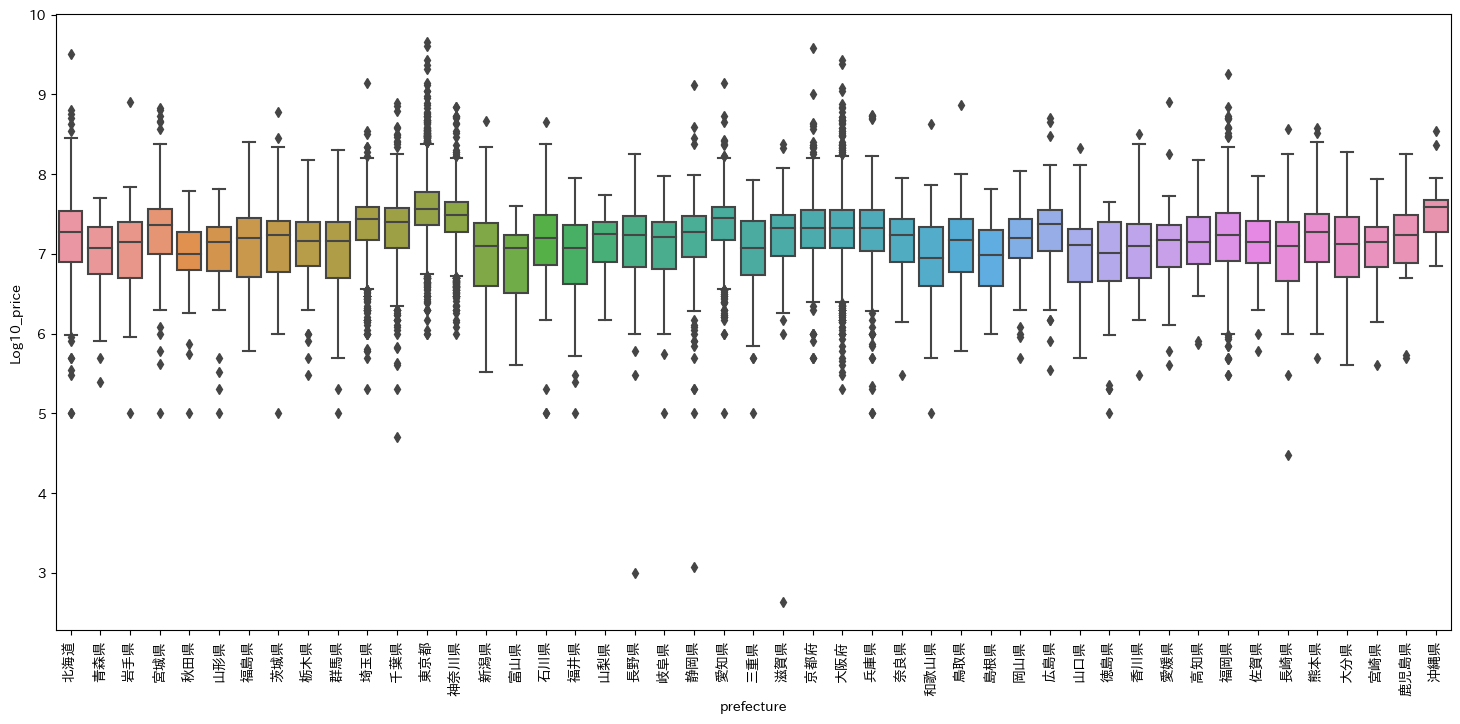

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18, 8))
fig = sns.boxplot(data=df, x='prefecture', y='Log10_price')
fig = plt.xticks(rotation=90) # 縦方向に都道府県の名称を並ぶように

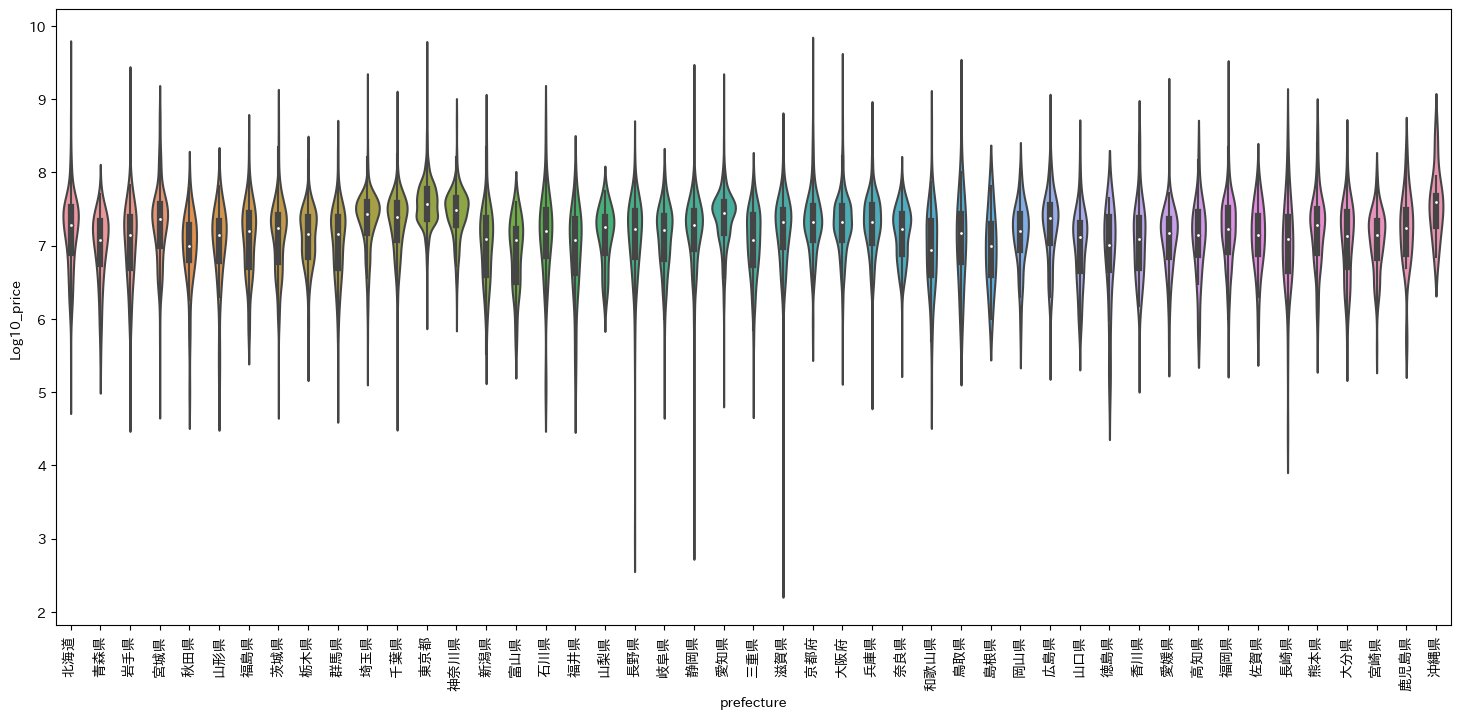

In [27]:
fig = plt.figure(figsize=(18, 8))
fig = sns.violinplot(data=df, x='prefecture', y='Log10_price')
fig = plt.xticks(rotation=90) # 縦方向に都道府県の名称を並ぶように

ヒートマップ

クロス集計を色付きで可視化するときに使用

In [28]:
df.head()

index      type land_type prefecture    city city2 station_name  \
0      1  中古マンション等       NaN        北海道  札幌市中央区   大通西        西１１丁目   
1      2  中古マンション等       NaN        北海道  札幌市中央区   大通西        西１１丁目   
2      3  中古マンション等       NaN        北海道  札幌市中央区   大通西        西１８丁目   
3      4  中古マンション等       NaN        北海道  札幌市中央区   大通西        西１８丁目   
4      5  中古マンション等       NaN        北海道  札幌市中央区   大通西        西１８丁目   

   building_year  station_dis     price  ...  room  area  land_shape frontage  \
0           2016          1.0  37000000  ...  ３ＬＤＫ  75.0         NaN      NaN   
1           2012          3.0  57000000  ...  ２ＬＤＫ  75.0         NaN      NaN   
2           1981          3.0  17000000  ...  ２ＬＤＫ  50.0         NaN      NaN   
3           1977          0.0   3200000  ...    １Ｒ  20.0         NaN      NaN   
4           1989          2.0  17000000  ...  ２ＬＤＫ  50.0         NaN      NaN   

   gross_floor_area building_type city_plan   BCR    FAR  Log10_price  
0               NaN            ＲＣ      商業地域  80.0  600.0     7.568202  
1               NaN            ＲＣ      商業地域  80.0  600.0     7.755875  
2               NaN            ＲＣ      商業地域  80.0  400.0     7.230449  
3               NaN           ＳＲＣ      商業地域  80.0  400.0     6.505150  
4               NaN           ＳＲＣ      商業地域  80.0  400.0     7.230449  

[5 rows x 21 columns]

In [29]:
df['building_type'].unique()

array(['ＲＣ', 'ＳＲＣ', '鉄骨造', '木造', nan, '軽量鉄骨造', 'ＲＣ、木造', 'ブロック造',
       '木造、ブロック造', '鉄骨造、軽量鉄骨造', 'ＳＲＣ、ＲＣ', '鉄骨造、木造', 'ＲＣ、木造、軽量鉄骨造',
       '木造、軽量鉄骨造', 'ＳＲＣ、鉄骨造', 'ＲＣ、鉄骨造', 'ＲＣ、鉄骨造、木造'], dtype=object)

In [31]:
target_building_type = ['ＲＣ', 'ＳＲＣ', '鉄骨造', '木造']
query = 'building_type in @target_building_type'
my_pivot = pd.pivot_table(df.query(query), index='building_type', columns='city_plan',
                            values='index', aggfunc='count')

In [32]:

my_pivot

city_plan        商業地域   工業地域  工業専用地域  市街化区域及び市街化調整区域外の都市計画区域  市街化調整区域  準住居地域  \
building_type                                                                  
木造              138.0   68.0     1.0                   269.0    286.0   56.0   
鉄骨造             127.0   36.0     8.0                    24.0     24.0   13.0   
ＲＣ             1442.0  147.0     NaN                     5.0     16.0  123.0   
ＳＲＣ            1035.0   26.0     NaN                     NaN     11.0   20.0   

city_plan      準工業地域  準都市計画区域  第１種中高層住居専用地域  第１種低層住居専用地域  第１種住居地域  \
building_type                                                       
木造             366.0      6.0        1046.0       1677.0   1542.0   
鉄骨造             83.0      1.0          67.0         20.0    128.0   
ＲＣ             665.0      NaN         746.0        220.0    853.0   
ＳＲＣ            216.0      NaN         158.0          5.0    211.0   

city_plan      第２種中高層住居専用地域  第２種低層住居専用地域  第２種住居地域  近隣商業地域  都市計画区域外  
building_type                                                       
木造                    431.0         54.0    216.0   219.0     82.0  
鉄骨造                    38.0          3.0     45.0   100.0     10.0  
ＲＣ                    240.0         17.0    287.0   635.0      3.0  
ＳＲＣ                    50.0          NaN     57.0   192.0      NaN

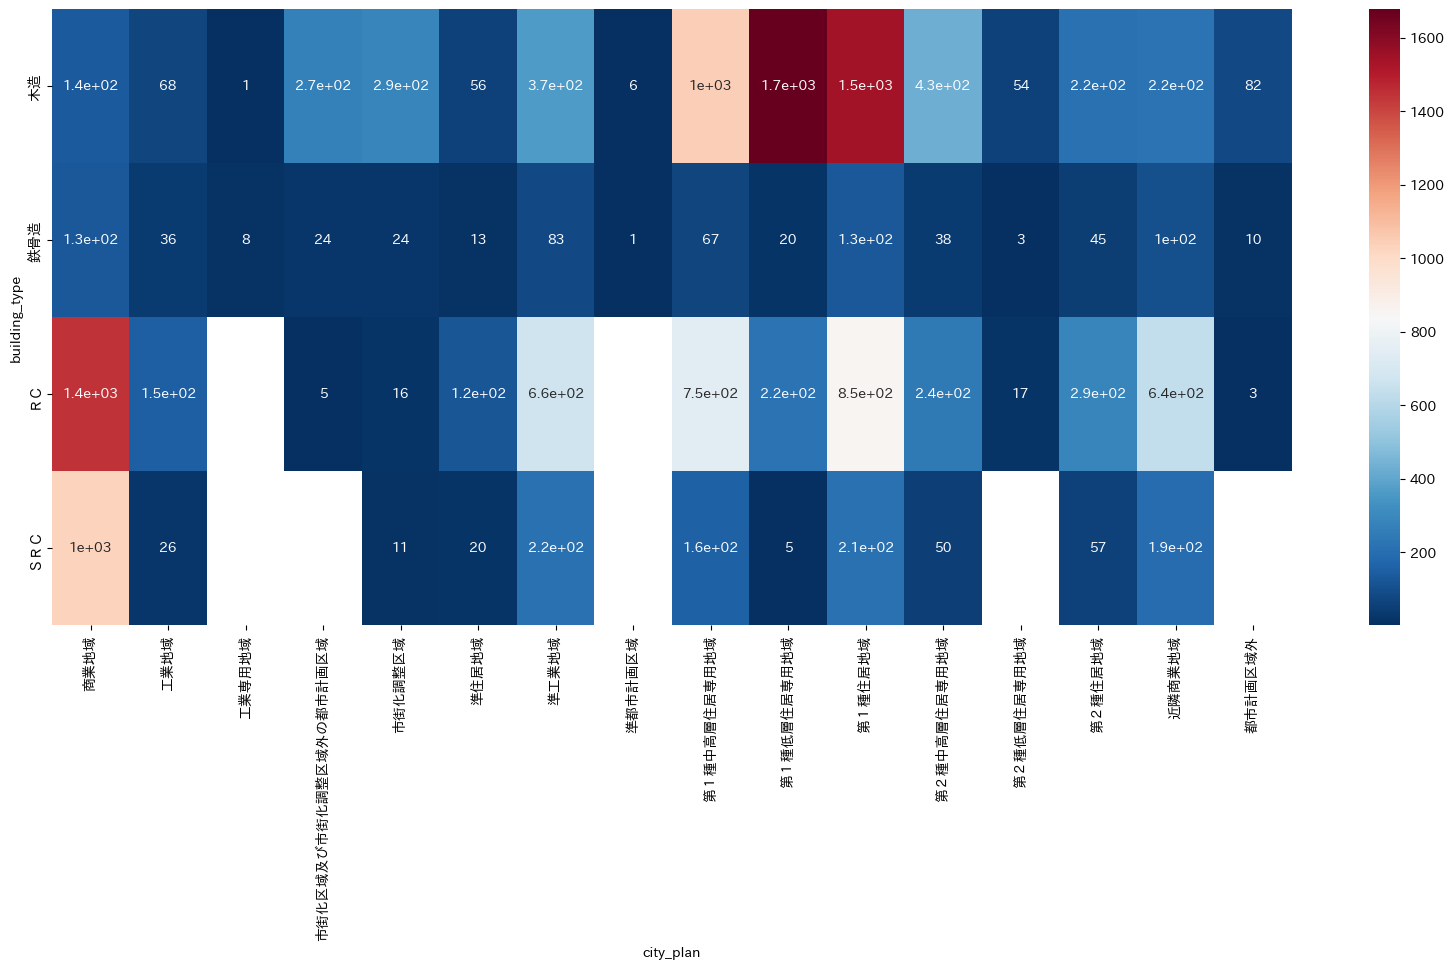

In [34]:
fig = plt.figure(figsize=(20.,8))
fig = sns.heatmap(my_pivot, annot=True, cmap='RdBu_r')

facetGrid

matplotlibのsabplotの高機能バージョン

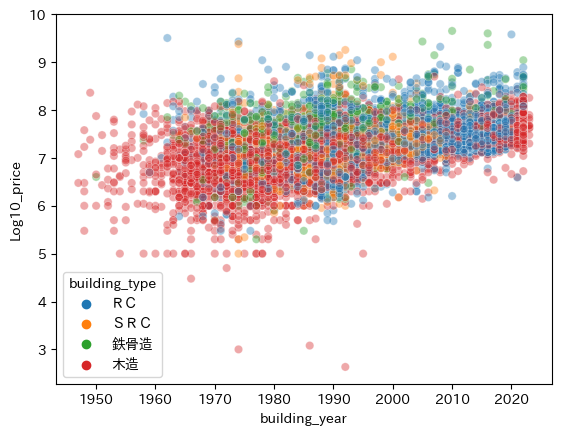

In [35]:
query = 'building_type in ["ＲＣ", "ＳＲＣ", "鉄骨造", "木造"]'
fig = sns.scatterplot(data=df.query(query), x='building_year', y='Log10_price',
                    hue='building_type', alpha=0.4)

C:\Users\TakagiNaoki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


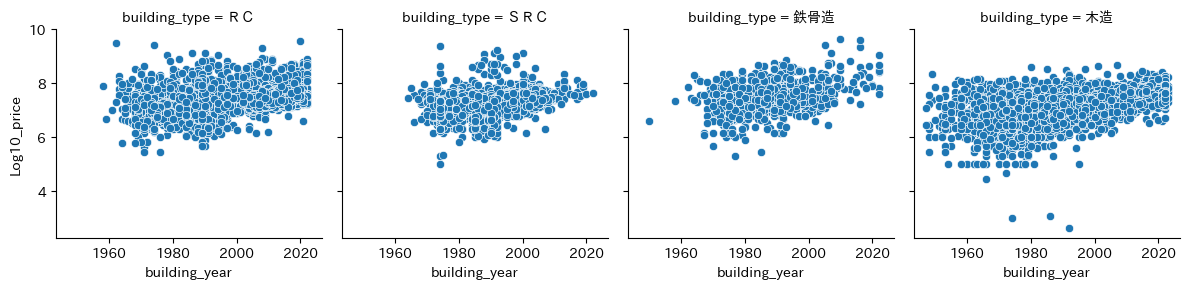

In [36]:
# buildnig_typeごとに図を書き分ける
g = sns.FacetGrid(df.query(query), col='building_type')
g.map(sns.scatterplot, 'building_year', 'Log10_price')

scatter

plotlyでインタラクティブな可視化をする

In [42]:
import pandas as pd
import numpy as np
import plotly.express as px
import japanize_matplotlib

In [39]:
# データセットの用意
file_path = '../dataset/house_price_jp.csv'
df = pd.read_csv(file_path, sep=',')

### 前処理

In [41]:
# priceカラムの各値に対して10を底とする対数を計算し、新しいカラムLog10_priceに結果を格納
df['Log10_price'] = df['price'].apply(lambda x: np.log10(x))
# 1H30?2H等はNanで埋めて残りを数値にする
df['station_dis'] = pd.to_numeric(df['station_dis'], errors='coerce')
# 2000㎡以上をNanにし残りを数値にする
df['area'] = pd.to_numeric(df['area'], errors='coerce')
# Nan値をdropする
df = df.dropna(subset=['station_dis', 'area'])

In [43]:
query = 'building_type in ["ＲＣ", "ＳＲＣ", "鉄骨造", "木造"]'
fig = px.scatter(df.query(query), x='building_year', y='Log10_price',
                width=800, height=600)
fig.show()

In [44]:
query = 'building_type in ["ＲＣ", "ＳＲＣ", "鉄骨造", "木造"]'
fig = px.scatter(df.query(query), x='building_year', y='Log10_price',
                facet_col='building_type', color='area', hover_data=['prefecture'],
                width=1200, height=600)
fig.show()

In [45]:
query = 'building_type in ["ＲＣ", "ＳＲＣ", "鉄骨造", "木造"]'
fig = px.scatter(df.query(query), x='building_year', y='Log10_price',
                facet_col='prefecture', facet_col_wrap=6, color='area', hover_data=['prefecture'],
                width=1200, height=600)
fig.show()

histgram

データ分析ではよく使用する

In [47]:
fig = px.histogram(df.query(query), x='Log10_price', facet_col='building_type',
                    width=1200, height=600)
fig.show()